## Esmeralda z-effect study

### GD/ JAH   17/10/19

In [1]:
import time
print(time.asctime())

Wed Nov  6 16:32:42 2019


In [2]:
%load_ext autoreload
%autoreload 2

import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt
import utils             as ut

import invisible_cities.core.fit_functions as fitf

to_df = pd.DataFrame.from_records

## Get data

In [3]:
#datadir  = "/home/jrenner/analysis/7431/hdf5/JJ_maps_100_7430_7433/ntuple/trigger2"
#filename = "/ntuple_9040_7431_trigger2_v1.1.0_20190801_bg.h5"

run_numbers = [7430, 7431, 7432, 7433, 7435]
type_peak  = 'dspsel'
#idatadir   = f"/home/hernando/ICAROSNB/JAH/esmes"
ifiles     = [f"/home/hernando/ICAROSNB/JAH/esmes/esmeralda_{run_number}_{type_peak}_script.h5" 
              for run_number in run_numbers]

In [4]:
#ktype = 'dsp' if type_peak == 'dspsel' else 'php'
#df = ut.complete_df_from_files(ifiles, ktype)

In [5]:
write = False
if (write):
    ofile = f"/home/hernando/ICAROSNB/JAH/esmes/df_7430_7435_{type_peak}_1030.h5"
    print('write onto ', ofile)
    df.to_hdf(ofile, 'esmes')

In [6]:
ifile = f"/home/hernando/ICAROSNB/JAH/esmes/df_7430_7435_{type_peak}_1030.h5"
print(ifile)
df = pd.read_hdf(ifile, 'esmes')

/home/hernando/ICAROSNB/JAH/esmes/df_7430_7435_dspsel_1030.h5


In [7]:
eref = 1592 if type_peak == 'dspsel' else 2615.
fen, fec, fek, fel = eref/np.mean(df.energy), eref/np.mean(df.ecc), eref/np.mean(df.ecdz), eref/np.mean(df.ecln)
print(fec*np.mean(df.ecc), fek*np.mean(df.ecdz), fel*np.mean(df.ecln))

1592.0 1592.0 1592.0


In [8]:
factor = 1.
df.energy = factor * fen * df.energy
df.ecln   = factor * fel * df.ecln
df.ecc    = factor * fec * df.ecc
df.ecdz   = factor * fek * df.ecdz

In [9]:
isel = (df.S1e < 2000.) & (df.nS2 == 1) & (df.r_max < 180.) & (df.dz < 120.)
sdf = df[isel]

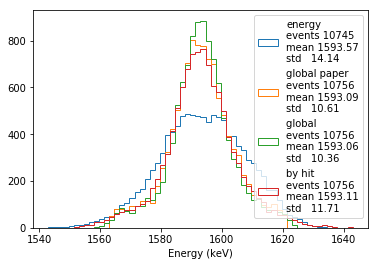

In [10]:
nbins = 60
erange = (1600.-57, 1700.-57) if type_peak is 'dspsel' else (2650.-90, 2780.-90)
#erange = (2500., 2900.)
ut.hist(sdf.energy.values, nbins, erange, label = 'energy');
ut.hist(sdf.ecln  .values, nbins, erange, fig = False, label = 'global paper');
ut.hist(sdf.ecdz  .values, nbins, erange, fig = False, label = 'global ');
ut.hist(sdf.ecc   .values, nbins, erange, fig = False, label = 'by hit');
plt.xlabel('Energy (keV)');

energy resolution =   2.14 FWHM
energy resolution =   1.32 FWHM
energy resolution =   1.17 FWHM
energy resolution =   1.37 FWHM


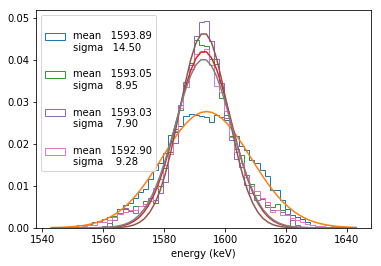

In [11]:
ut.plot_energy_resolution(sdf.energy.values, nbins, erange);
ut.plot_energy_resolution(sdf.ecln  .values, nbins, erange);
ut.plot_energy_resolution(sdf.ecdz  .values, nbins, erange);
ut.plot_energy_resolution(sdf.ecc   .values, nbins, erange);
plt.xlabel('energy (keV)');

## Position of the blobs

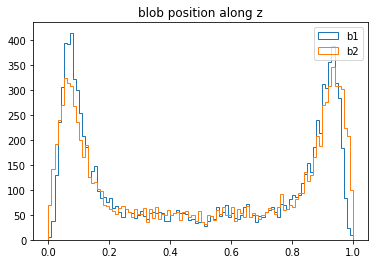

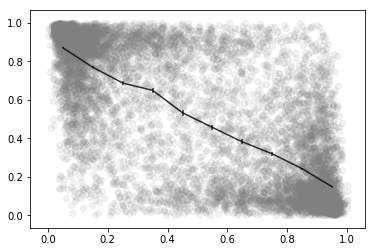

In [12]:
ut.hist(sdf.fdzb1, 100, label = 'b1', stats = False);
ut.hist(sdf.fdzb2, 100, fig = False, label = 'b2', stats = False);
plt.title('blob position along z')
ut.hpscatter(sdf.fdzb1, sdf.fdzb2, alpha = 0.1, c = 'grey');

dz at  0.0 :  7.577312500000005
dz at  25.0 :  35.424421875000014
dz at  33.0 :  37.72595000000003
dz at  50.0 :  45.572156250000006
dz at  66.0 :  53.4904
dz at  75.0 :  57.776874999999976
dz at  100.0 :  119.5173125


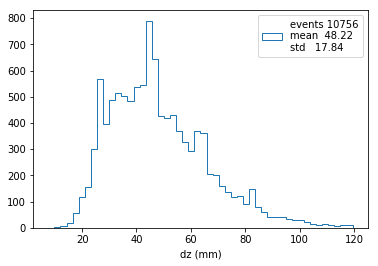

In [13]:
ut.hist(sdf.dz, 50);
plt.xlabel('dz (mm)');
for per in [0., 25., 33., 50., 66., 75., 100.]:
    print('dz at ', per, ': ', np.percentile(sdf.dz, per))

In [57]:
# select left and right blob
dzmin, dzmax= 7.5, 120.
sel_dzrange = (sdf.dz > dzmin) & (sdf.dz < dzmax)      # dz in range
sel_b1b2  = (sdf.fdzb2 > 0.8) & (sdf.fdzb1 < 0.2)    # b1-left and b2-right
sel_b2b1  = (sdf.fdzb2 < 0.2) & (sdf.fdzb1 > 0.8)    # b1-left and b2-right
sel_bb    =  np.logical_or(sel_b1b2, sel_b2b1)
sel_bbcom = ~np.logical_or(sel_b1b2, sel_b2b1)
sel_b1    =  sdf.eblob1 > 0.160 
sel_b1l   =  sel_b1 & (sdf.fdzb1 < 0.2)
sel_b1r   =  sel_b1 & (sdf.fdzb1 > 0.8)
sel_b2    =  sdf.eblob2 > 0.160 # 0.160

sel_long  =  sdf.dz >= np.percentile(sdf.dz, 75.)
print('long tracks ', np.percentile(sdf.dz, 75))

sela = sel_b1b2  & sel_dzrange & sel_b2 
selb = sel_b2b1  & sel_dzrange & sel_b2 
selc = sel_bb    & sel_dzrange & sel_b2 
selr = sel_bbcom & sel_dzrange & sel_b2

#selbs = np.logical_or(sel_b1b2, sel_b2b1) & sel_dzrange & sel_b2 

#sela = sel_b1l & sel_dzrange #& ~sel_b2
#selb = sel_b1r & sel_dzrange #& ~sel_b2
#selc = (~np.logical_or(sel_b1l, sel_b1r)) & sel_dzrange & sel_b1

selal = sela & sel_long
selbl = selb & sel_long
selcl = selc & sel_long
selrl = selr & sel_long


print('number of events blob1 on left         ', np.sum(sela), np.sum(selal))
print('number of events blob1 on right        ', np.sum(selb), np.sum(selbl))
print('number of events blobs on extremes     ', np.sum(selc), np.sum(selcl))
print('number of events blobs not on extremes ', np.sum(selr), np.sum(selrl))

long tracks  57.776874999999976
number of events blob1 on left          2363 908
number of events blob1 on right         2187 794
number of events blobs on extremes      4550 1702
number of events blobs not on extremes  4132 235


dz at  0.0 :  7.577312500000005
dz at  25.0 :  35.424421875000014
dz at  33.0 :  37.72595000000003
dz at  50.0 :  45.572156250000006
dz at  66.0 :  53.4904
dz at  75.0 :  57.776874999999976
dz at  100.0 :  119.5173125


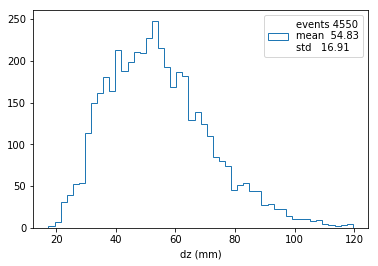

In [15]:
ut.hist(sdf.dz[selc], 50);
plt.xlabel('dz (mm)');
for per in [0., 25., 33., 50., 66., 75., 100.]:
    print('dz at ', per, ': ', np.percentile(sdf.dz, per))

In [16]:
#ut.hpscatter(sdf.fdzb1[sela], sdf.fdzb2[sela], alpha = 0.1);
#ut.hpscatter(sdf.fdzb1[selb], sdf.fdzb2[selb], alpha = 0.1);
#ut.hpscatter(sdf.fdzb1[selc], sdf.fdzb2[selc], alpha = 0.1);

In [17]:
#ylabels = ['slcq'+str(i) for i in range(nslices)]
#xlabels = ['dz']
#for ylabel in ylabels:
#    ut.inspect_corr(ylabel, sdf, xlabels, alpha = 0.5, nbins_profile = 30, c = 'grey');

In [18]:
#nslices = 7
#ylabels = ['slce'+str(i) for i in range(nslices)]
#xlabels = ['dz']
#for ylabel in ylabels:
#    ut.inspect_corr(ylabel, sdf, xlabels, alpha = 0.5, nbins_profile = 30, c = 'grey');

## Study slices vs dz

### total energy vs dz for the different samples

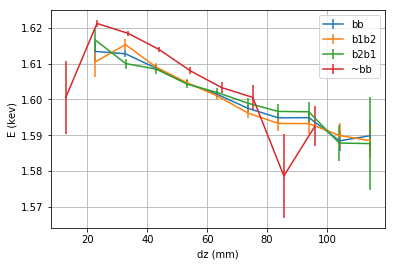

In [19]:
bins = 10
nslices = 7
etotc  = ut.slices_total(sdf[selc], nslices)
#ectot = ut.slices_total(sdf[selc], nslices, 'slcec')
etota = ut.slices_total(sdf[sela], nslices)
etotb = ut.slices_total(sdf[selb], nslices)
etotc = ut.slices_total(sdf[selc], nslices)
etotd = ut.slices_total(sdf[selr], nslices) 

#ut.hprofile(sdf[selc].dz, ectot , nbins_profile = 16, fig = False, label = 'cor' )
ut.hprofile(sdf[selc].dz, etotc, nbins_profile = bins, fig = True , label = 'bb' )
ut.hprofile(sdf[sela].dz, etota, nbins_profile = bins, fig = False, label = 'b1b2')
ut.hprofile(sdf[selb].dz, etotb, nbins_profile = bins, fig = False, label = 'b2b1')
ut.hprofile(sdf[selr].dz, etotd, nbins_profile = bins, fig = False, label = '~bb' )


plt.grid(); plt.legend();
plt.xlabel('dz (mm)');
plt.ylabel('E (kev)');

#### all samples seems to loose same energy vs dz

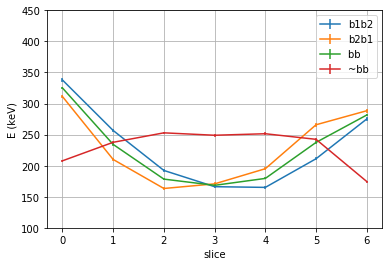

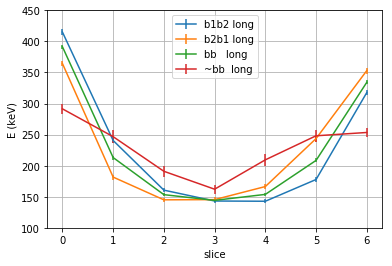

In [54]:
norma = False
ut.plt_slices(sdf[sela], nslices, label = 'b1b2', norma = norma);
ut.plt_slices(sdf[selb], nslices, label = 'b2b1', fig = False, norma = norma);
ut.plt_slices(sdf[selc], nslices, label = 'bb  ', fig = False, norma = norma);
ut.plt_slices(sdf[selr], nslices, label = '~bb ', fig = False, norma = norma);
plt.xlabel('slice'); plt.ylabel('E (keV)'); plt.legend(); plt.grid();
plt.ylim(100., 450.);

ut.plt_slices(sdf[selal], nslices, label = 'b1b2 long', norma = norma);
ut.plt_slices(sdf[selbl], nslices, label = 'b2b1 long', fig = False, norma = norma);
ut.plt_slices(sdf[selcl], nslices, label = 'bb   long', fig = False, norma = norma);
ut.plt_slices(sdf[selrl], nslices, label = '~bb  long', fig = False, norma = norma);
plt.xlabel('slice'); plt.ylabel('E (keV)'); plt.legend(); plt.grid();
plt.ylim(100., 450.);

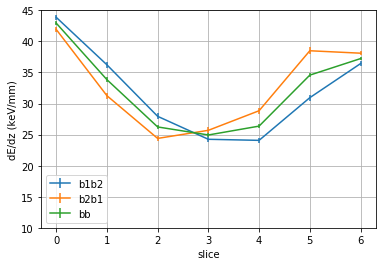

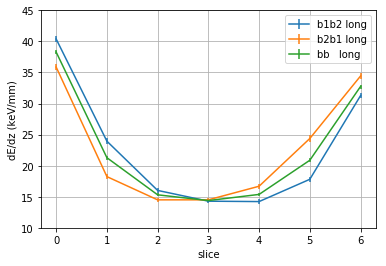

In [21]:
norma = True
ut.plt_slices(sdf[sela], nslices, label = 'b1b2', norma = norma);
ut.plt_slices(sdf[selb], nslices, label = 'b2b1', fig = False, norma = norma);
ut.plt_slices(sdf[selc], nslices, label = 'bb'  , fig = False, norma = norma);
plt.xlabel('slice'); plt.ylabel('dE/dz (keV/mm)'); plt.legend(); plt.grid();
plt.ylim(10., 45.);

ut.plt_slices(sdf[selal], nslices, label = 'b1b2 long', norma = norma);
ut.plt_slices(sdf[selbl], nslices, label = 'b2b1 long', fig = False, norma = norma);
ut.plt_slices(sdf[selcl], nslices, label = 'bb   long', fig = False, norma = norma);
plt.xlabel('slice'); plt.ylabel('dE/dz (keV/mm)'); plt.legend(); plt.grid();
plt.ylim(10., 45.);

### Slices vs dz

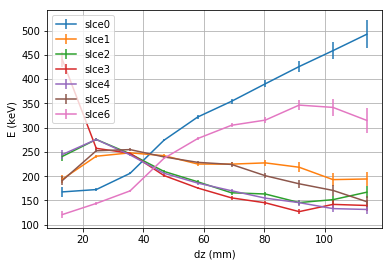

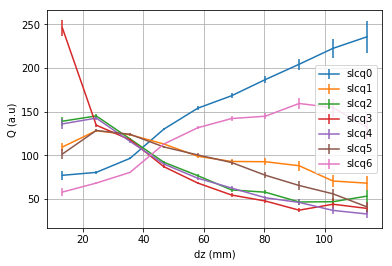

In [22]:
nslices = 7
ut.hprofile_slices(sdf, nslices, label = 'slce'  , bins = bins);
#ut.hprofile_slices(sdf, nslices, label = 'slcec' , bins = bins);
ut.hprofile_slices(sdf, nslices, label = 'slcq'  , bins = bins, factor = 1./22.);
plt.ylabel('Q (a.u)');

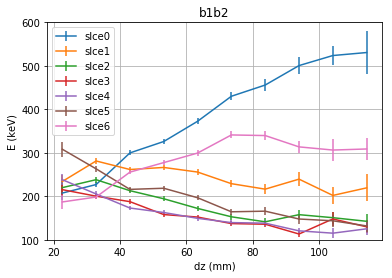

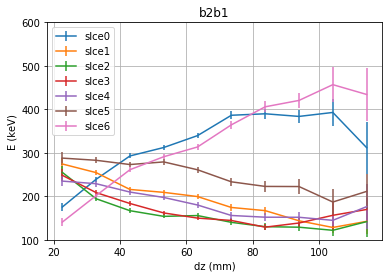

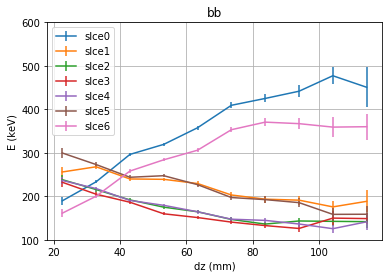

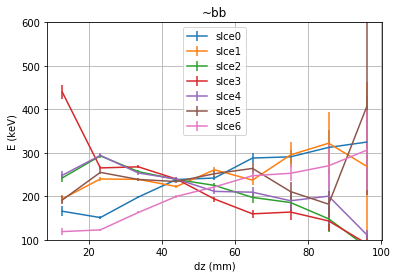

In [55]:
ut.hprofile_slices(sdf[sela], nslices, 'slce', bins = 10);
plt.title('b1b2'); plt.ylim(100., 600.);
ut.hprofile_slices(sdf[selb], nslices, 'slce', bins = 10);
plt.title('b2b1'); plt.ylim(100., 600.);
ut.hprofile_slices(sdf[selc], nslices, 'slce', bins = 10);
plt.title('bb'); plt.ylim(100., 600.);
ut.hprofile_slices(sdf[selr], nslices, 'slce', bins = 10);
plt.title('~bb'); plt.ylim(100., 600.);

In [24]:
#ut.hprofile_slices(sdf[sela], nslices, 'slcec', bins = bins);
#plt.title('b1b2'); plt.ylim(100., 900.);
#ut.hprofile_slices(sdf[selb], nslices, 'slcec', bins = bins);
#plt.title('b2b1'); plt.ylim(100., 900.);

In [25]:
#ut.hprofile_slices(sdf[sela], nslices, 'slce', bins = 14, norma = True);
#plt.title('b1 left');
#plt.ylabel('dEdz (keV/mm)')
#ut.hprofile_slices(sdf[selb], nslices, 'slce', bins = 14, norma = True);
#plt.title('b1 right');
#plt.ylabel('dEdz (keV/mm)');

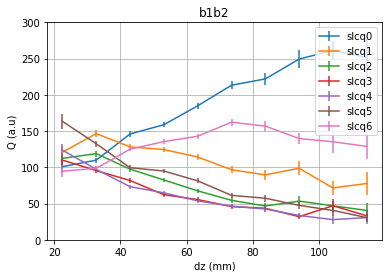

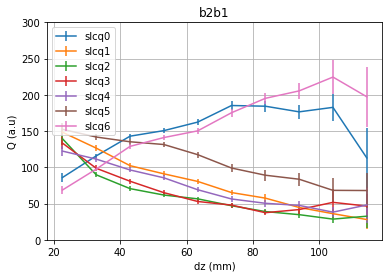

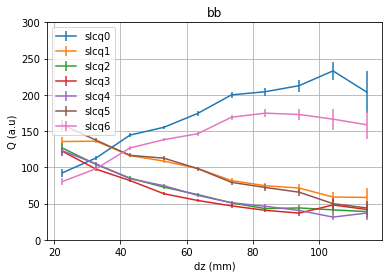

In [26]:
ut.hprofile_slices(sdf[sela], nslices, 'slcq', bins = 10, factor = 1./22.);
plt.title('b1b2'); plt.ylabel('Q (a.u)'); plt.ylim(0., 300.);
ut.hprofile_slices(sdf[selb], nslices, 'slcq', bins = 10, factor = 1./22.);
plt.title('b2b1'); plt.ylabel('Q (a.u)'); plt.ylim(0., 300.);
ut.hprofile_slices(sdf[selc], nslices, 'slcq', bins = 10, factor = 1./22.);
plt.title('bb'); plt.ylabel('Q (a.u)'); plt.ylim(0., 300.);

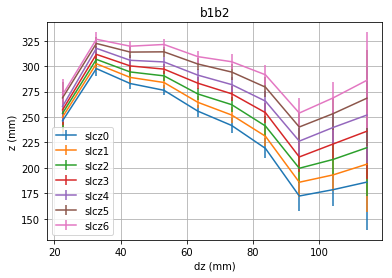

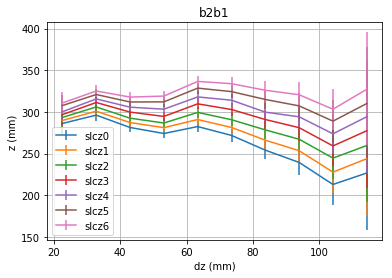

In [27]:
ut.hprofile_slices(sdf[sela], nslices, 'slcz', bins = 10, factor = 1.);
plt.title('b1b2'); plt.ylabel('z (mm)')
ut.hprofile_slices(sdf[selb], nslices, 'slcz', bins = 10, factor = 1.);
plt.title('b2b1'); plt.ylabel('z (mm)');

## Profiles of the blob1

### All tracks left/right

In [28]:
dzrange, erange, bins = (-120., 120), (0., 120.), 80

ldf   = ut.dfslices(sdf[sela], nslices)
rdf   = ut.dfslices(sdf[selb], nslices)

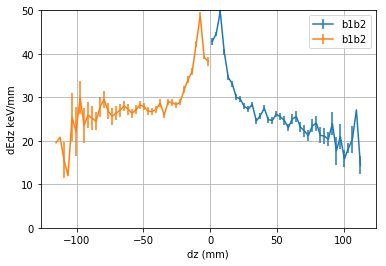

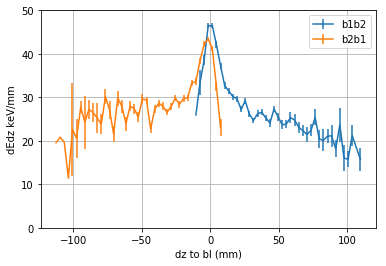

In [29]:
ut.plt_slices_profile(ldf, rdf, 'b1b2', 'b2b1', dzrange, erange, bins = bins);

In [30]:
### Now us using hit correction - all traks

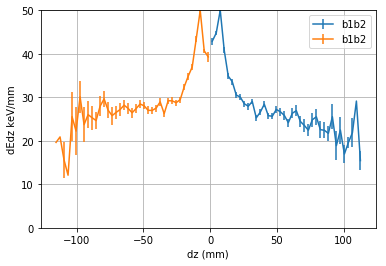

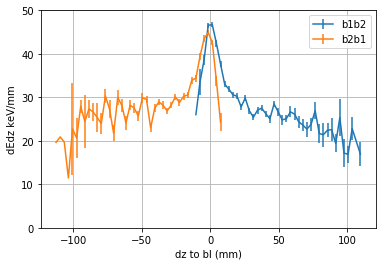

In [31]:
ut.plt_slices_profile(ldf, rdf, 'b1b2', 'b2b1', dzrange, erange, bins = bins, varlabel = 'ecc');

### long tracks left/right

In [32]:
dzrange, erange, bins = (-120., 120), (0., 120.), 80

ldf   = ut.dfslices(sdf[selal], nslices)
rdf   = ut.dfslices(sdf[selbl], nslices)

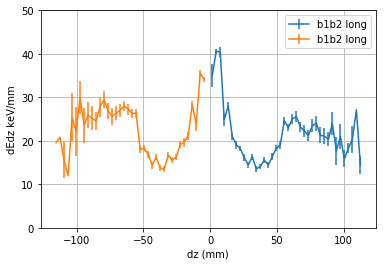

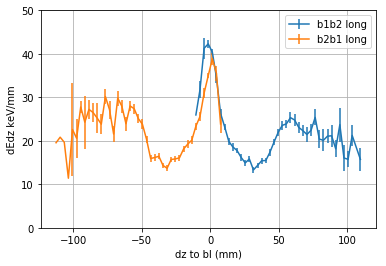

In [33]:
ut.plt_slices_profile(ldf, rdf, 'b1b2 long', 'b2b1 long', dzrange, erange, bins = bins);

### very long tracks left/right

In [34]:
per0, dper = 85., 5. # 85
bins = 60
z0, z1 = np.percentile(sdf.dz, per0), np.percentile(sdf.dz, per0 + dper)
print('dz in range ', z0, z1)
sel_vlong  =  (sdf.dz >= z0) & (sdf.dz < z1)

selavl = sela & sel_vlong
selbvl = selb & sel_vlong
selcvl = selc & sel_vlong

print('left  tracks ', np.sum(selavl))
print('right tracks ', np.sum(selbvl))

dz in range  67.40765625 71.79656250000002
left  tracks  181
right tracks  173


In [35]:
ldf   = ut.dfslices(sdf[selavl], nslices)
rdf   = ut.dfslices(sdf[selbvl], nslices)

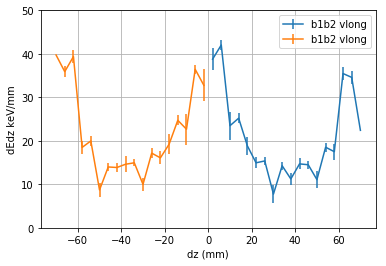

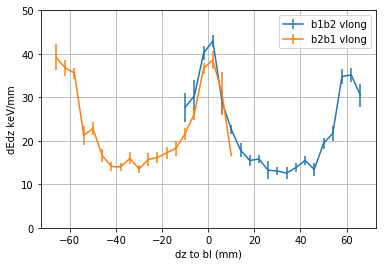

In [36]:
ut.plt_slices_profile(ldf, rdf, 'b1b2 vlong', 'b2b1 vlong', dzrange, erange, bins = bins);

### now using hit correction

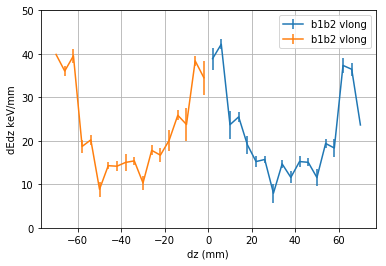

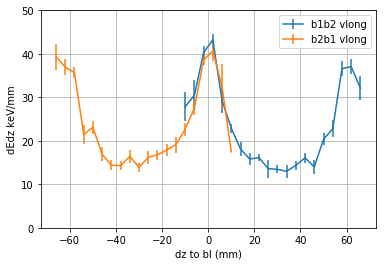

In [37]:
ut.plt_slices_profile(ldf, rdf, 'b1b2 vlong', 'b2b1 vlong', dzrange, erange, bins = bins, varlabel = 'ecc');

### Now using the charge

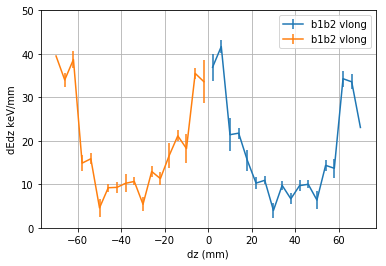

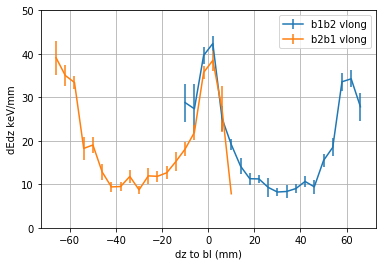

In [38]:
ut.plt_slices_profile(ldf, rdf, 'b1b2 vlong', 'b2b1 vlong', dzrange, erange, 
                      bins = bins, varlabel = 'q', factor = 1./11.);

## Extra studies

In [39]:
ei  = ut.slices_total(sdf[selal], (0, 1))
eta = ut.slices_total(sdf[selal], nslices)

ef  = ut.slices_total(sdf[selbl], (5, 6))
etb = ut.slices_total(sdf[selbl], nslices)

print('left  ', ut.stats(1000. * ei))
print('left  ', ut.stats(1000. * eta))
print('left  ', ut.stats(ei/eta))

print('right  ', ut.stats(1000. * ef))
print('right  ', ut.stats(1000. * etb))
print('right ', ut.stats(ef/etb))

left   (908, 655.621559112785, 170.56546466163357, 0)
left   (908, 1597.5274663009413, 23.450871189897676, 0)
left   (908, 0.41041521076301923, 0.1066332745391902, 0)
right   (794, 596.6419911141625, 163.66898064784309, 0)
right   (794, 1599.4864675040117, 21.563269554452788, 0)
right  (794, 0.37312982318781784, 0.10264950603612452, 0)


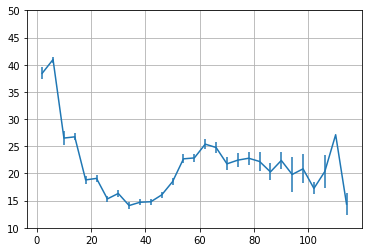

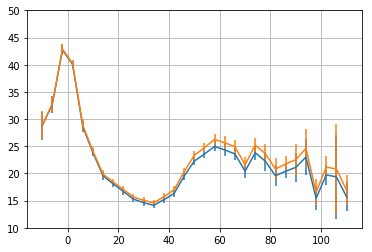

In [40]:
ldf   = ut.dfslices(sdf[selal], nslices)
ut.hprofile(ldf.dz, 1000.*ldf.ec , urange = dzrange, vrange = erange, nbins_profile = bins)

plt.grid(); plt.ylim(10., 50);
ut.hprofile(ldf.dz1, 1000.*ldf.ec , urange = dzrange, vrange = erange, nbins_profile = bins)
ut.hprofile(ldf.dz1, 1000.*ldf.ecc, urange = dzrange, vrange = erange, nbins_profile = bins, fig = False)
plt.grid(); plt.ylim(10., 50);

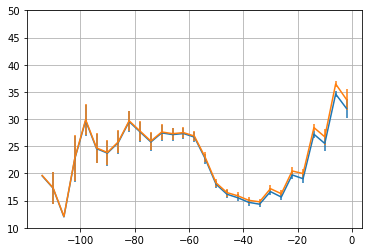

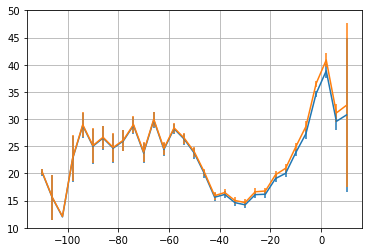

In [41]:
rdf   = ut.dfslices(sdf[selbl], nslices)
ut.hprofile(rdf.dzr, 1000.*rdf.ec , urange = dzrange, vrange = erange, nbins_profile = bins)
ut.hprofile(rdf.dzr, 1000.*rdf.ecc, urange = dzrange, vrange = erange, nbins_profile = bins, fig = False);
plt.grid(); plt.ylim(10., 50);
ut.hprofile(rdf.dz1, 1000.*rdf.ec , urange = dzrange, vrange = erange, nbins_profile = bins)
ut.hprofile(rdf.dz1, 1000.*rdf.ecc, urange = dzrange, vrange = erange, nbins_profile = bins, fig = False);
plt.grid(); plt.ylim(10., 50);

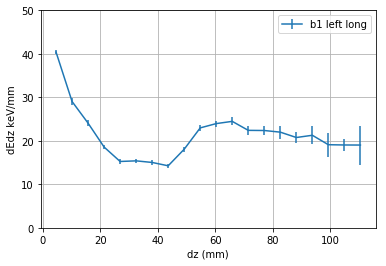

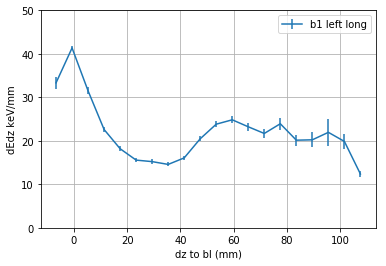

In [42]:
ut.plt_slices_profile(ldf, llabel = 'b1 left long', bins = 20);

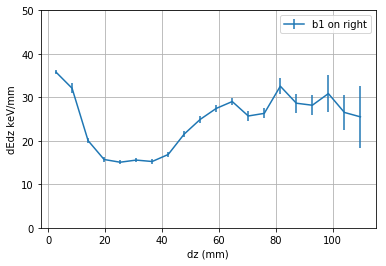

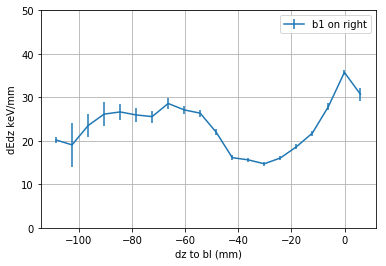

In [43]:
ut.plt_slices_profile(rdf, llabel = 'b1 on right', bins = 20);

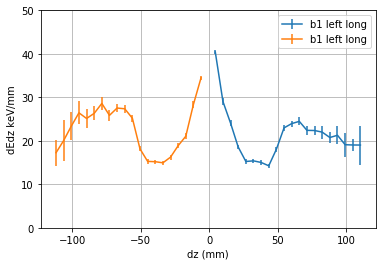

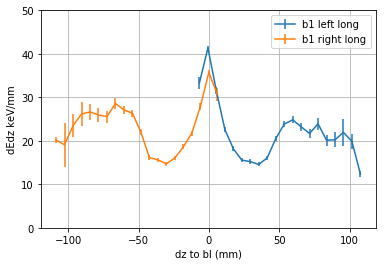

In [44]:
ut.plt_slices_profile(ldf, rdf, llabel = 'b1 left long', rlabel = 'b1 right long',  bins = 20);

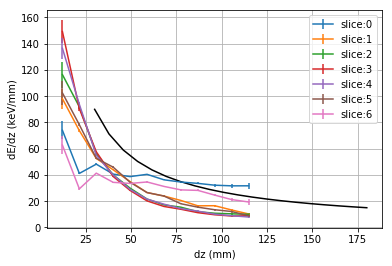

In [45]:
ksel = sdf.fdzb1 < 2.
for i in range(nslices):
    fig = True if i == 0 else False
    ut.hprofile(sdf.dz[ksel], nslices*1000.*sdf['slce'+str(i)][ksel]/sdf.dz[ksel],
                label = 'slice:'+str(i), fig = fig, nbins_profile = 12)
dzs = np.linspace(30., 180, 20)
plt.plot(dzs, 2700./dzs, c = 'black');
plt.xlabel('dz (mm)');
plt.ylabel('dE/dz (keV/mm)')
#plt.yscale('log')
plt.grid();
plt.legend();

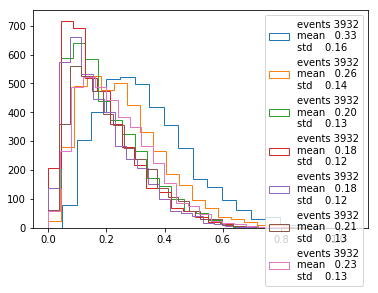

In [46]:
ksel = (sdf.fdzb1 < 0.2);
nslices = 7
for i in range(nslices):
    fig = True if i == 0 else False
    ut.hist(sdf['slce'+str(i)][ksel], 20, fig = fig)
plt.legend();

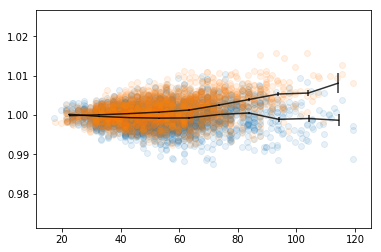

In [47]:
ut.hpscatter(sdf.dz[sela], sdf.ecc[sela]/sdf.ecdz[sela], alpha = 0.1);
ut.hpscatter(sdf.dz[selb], sdf.ecc[selb]/sdf.ecdz[selb], alpha = 0.1, fig = False);

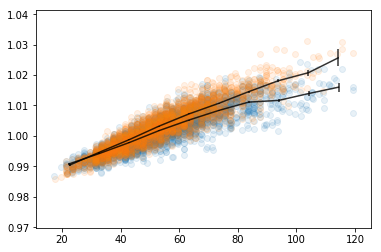

In [48]:
ut.hpscatter(sdf.dz[sela], sdf.ecc[sela]/sdf.energy[sela], alpha = 0.1);
ut.hpscatter(sdf.dz[selb], sdf.ecc[selb]/sdf.energy[selb], alpha = 0.1, fig = False);

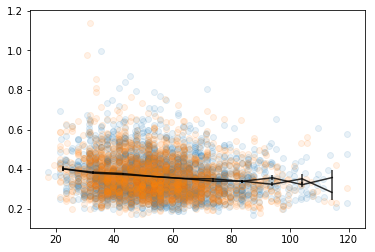

In [49]:
ut.hpscatter(sdf.dz[sela], sdf.eblob1[sela], alpha = 0.1);
ut.hpscatter(sdf.dz[selb], sdf.eblob1[selb], alpha = 0.1, fig = False);

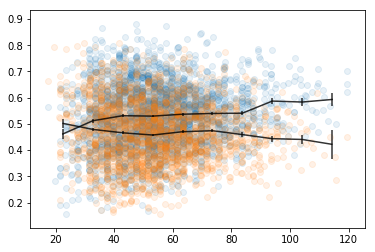

In [50]:
ut.hpscatter(sdf.dz[sela], sdf.eif[sela], alpha = 0.1);
ut.hpscatter(sdf.dz[selb], sdf.eif[selb], alpha = 0.1, fig = False);
#ut.hpscatter(sdf.dz, sdf.eif, alpha = 0.1, fig = False);

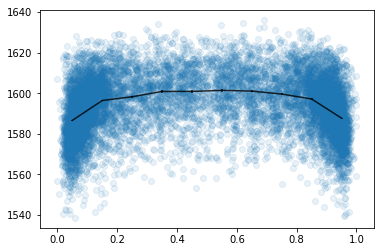

In [51]:
ut.hpscatter(sdf.dzb1/sdf.dz, sdf.energy, alpha = 0.1);

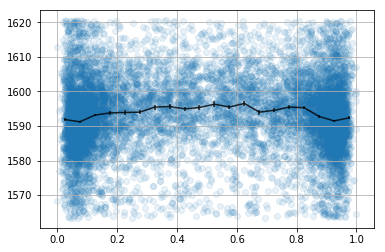

In [52]:
ut.hpscatter(sdf.dzb1/sdf.dz, sdf.ecln, alpha = 0.1, nbins_profile = 20);
plt.grid();

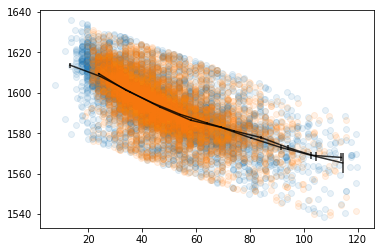

In [53]:
ksel = sdf.dzb1 < 15.
ut.hpscatter(sdf[ksel].dz, sdf.energy[ksel], alpha = 0.1);
ut.hpscatter(sdf[~ksel].dz, sdf.energy[~ksel], fig = False, alpha = 0.1);